#Validacion
#Test de Sync
#**Fase 1 | Avance de Proyecto**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Operaciones de Aprendizaje Automático**
####**Tecnológico de Monterrey**
#####**Prof L José Ángel Martínez Navarro**

#Prueba de Sync 2

###**Equipo 24:**

###
A01796937 - Sandra Luz Cervantes Espinoza

A01226881 - Héctor Jesús López Meza

A01796697 - Mauricio Torres Baena

A01795838 - Javier Augusto Rebull Saucedo

A01360416 – David Cruz Beltrán

**Información:**

*   Dataset Turkish Music Emotion archivo "Acoustic Features.csv".


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy import stats
from sklearn.metrics  import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [ ]:
# Cargamos desde PC
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Acoustic Features.csv")
df.head()

Saving Acoustic Features.csv to Acoustic Features.csv


,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


#**Proceso**

**Análisis exploratorio (EDA):**

*   Análisis descriptivo
* Análisis de variables numéricas
* Análisis de variables de texto
* Análisis de correlación (bivariante y multivariante)

**Preprocesamiento**
* Valores faltantes
* Valores atípicos

**Ingeniería de características**
**Entrenando y evaluando el modelo**


#**1. Análisis exploratorio (EDA)**

Estadísticas descriptivas

In [ ]:
estadisticas_descriptivas = df.describe()
estadisticas_descriptivas

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.134650,0.553605,7.145932,123.682020,2.456422,0.071890,0.488065,0.030465,0.178897,0.038307,...,0.354632,0.590975,0.342340,0.385620,0.328213,0.192997,-0.000157,1.762288,0.769690,0.966712
std,0.064368,0.050750,2.280145,34.234344,0.799262,0.537865,0.294607,0.275839,0.195230,0.203754,...,0.334976,0.357981,0.315808,0.348117,0.055520,0.047092,0.104743,0.930352,0.072107,0.003841
min,0.010000,0.302000,3.580000,48.284000,0.323000,-3.484000,-0.870000,-1.636000,-0.494000,-0.916000,...,0.000000,0.000000,0.000000,0.000000,0.112000,0.060000,-0.285000,0.187000,0.530000,0.939000
25%,0.085000,0.523000,5.859500,101.490250,1.948500,-0.262750,0.281250,-0.117000,0.061250,-0.078250,...,0.066750,0.264500,0.059500,0.060750,0.290750,0.160000,-0.058000,0.961000,0.725000,0.965000
50%,0.128000,0.553000,6.734000,120.132500,2.389500,0.068500,0.464500,0.044500,0.181000,0.049500,...,0.247000,0.612000,0.247000,0.296500,0.333000,0.190000,-0.002000,1.682000,0.786000,0.967000
75%,0.174000,0.583250,7.823500,148.986250,2.860250,0.413250,0.686000,0.198250,0.288500,0.151250,...,0.612000,1.000000,0.565250,0.670750,0.367250,0.226000,0.063250,2.243000,0.824000,0.969000
max,0.431000,0.703000,23.475000,195.026000,5.996000,1.937000,1.622000,1.126000,1.055000,0.799000,...,1.000000,1.000000,1.000000,1.000000,0.488000,0.340000,0.442000,4.486000,0.908000,0.977000


Valores únicos por variable para identificar posibles variables categóricas

In [ ]:
data_df_unique = df.nunique()
data_df_unique

,0
Class,4
_RMSenergy_Mean,196
_Lowenergy_Mean,166
_Fluctuation_Mean,377
_Tempo_Mean,388
_MFCC_Mean_1,354
_MFCC_Mean_2,347
_MFCC_Mean_3,319
_MFCC_Mean_4,316
_MFCC_Mean_5,297


Búsqueda de valores faltantes

In [ ]:
data_df_missing = df.isnull().sum()
data_df_missing

,0
Class,0
_RMSenergy_Mean,0
_Lowenergy_Mean,0
_Fluctuation_Mean,0
_Tempo_Mean,0
_MFCC_Mean_1,0
_MFCC_Mean_2,0
_MFCC_Mean_3,0
_MFCC_Mean_4,0
_MFCC_Mean_5,0


Diagrama de barras para determinar la frecuencia de las emociones

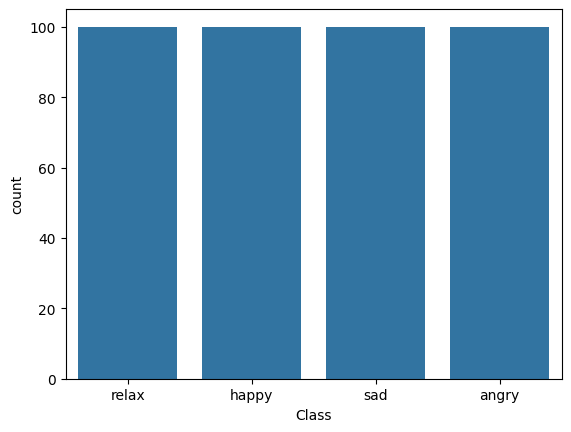

In [ ]:
sns.countplot(x='Class', data=df)
plt.show()


Histogramas para cada característica numérica, para ver qué tan equilibrados están los datos

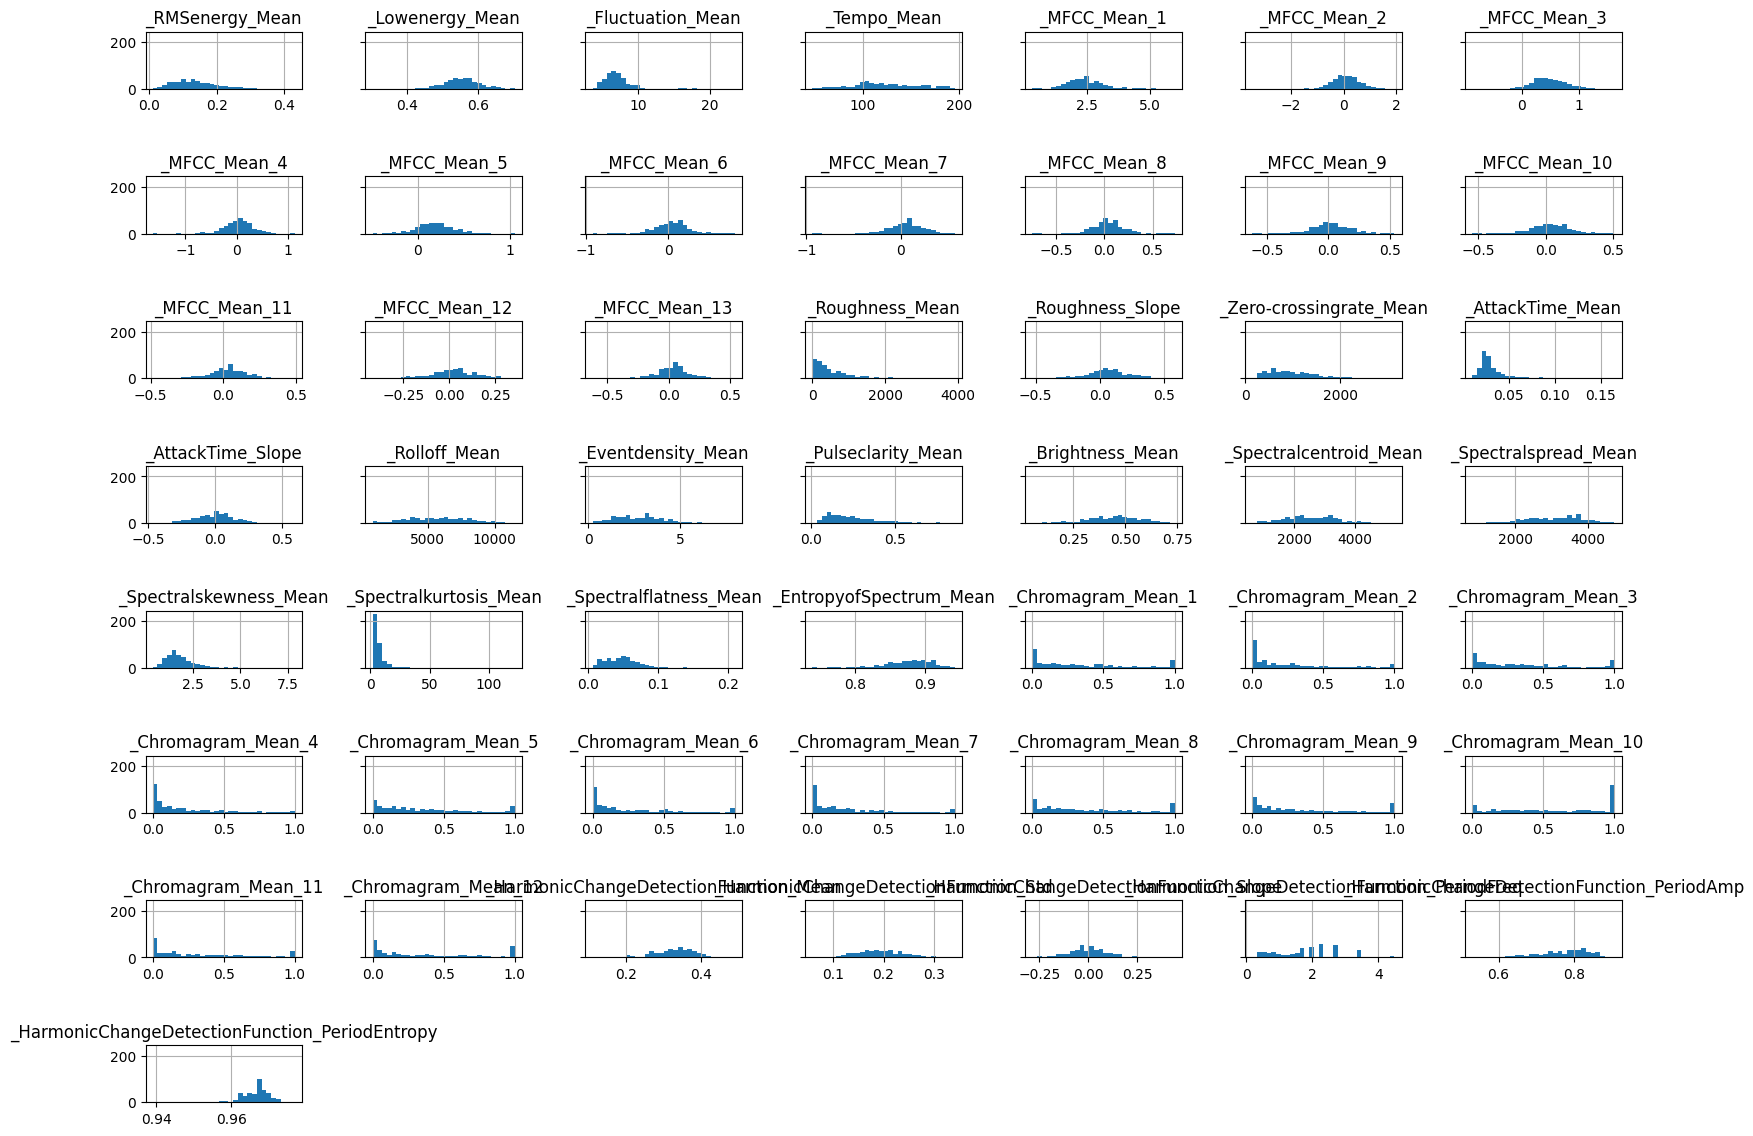

In [ ]:
hist = df.hist(bins=30, sharey=True, figsize=(16, 12))
plt.tight_layout(pad=3.0)
plt.show()

Tablas de frecuencia para cada característica categórica

In [ ]:
for column in df.select_dtypes(include=[ 'object', 'bool']).columns:
  display(column, pd.crosstab(index=df[column], columns='% observations', normalize='columns') * 100)

'Class'

col_0,% observations
Class,
angry,25.0
happy,25.0
relax,25.0
sad,25.0


In [ ]:
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df['Class'])
df

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,2,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,2,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,2,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,2,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,2,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,0,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,0,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,0,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


In [ ]:
df.corr()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
Class,1.000000,-0.291377,0.173706,0.252165,-0.056350,0.355568,0.048780,-0.123243,-0.066435,-0.043909,...,0.053530,-0.101021,-0.029250,0.057475,0.341521,0.660194,0.023897,-0.219457,-0.554729,-0.076389
_RMSenergy_Mean,-0.291377,1.000000,-0.273415,-0.156399,0.001152,-0.188618,-0.000266,0.050452,0.025707,-0.062594,...,0.110338,0.114638,0.128795,0.023996,-0.040561,-0.360318,-0.098910,0.149943,0.338638,0.023931
_Lowenergy_Mean,0.173706,-0.273415,1.000000,0.039196,-0.052698,0.120341,0.111297,-0.060049,0.048389,0.004994,...,0.070910,-0.022629,0.093674,-0.030368,0.049630,0.217618,0.223548,-0.115975,-0.198441,-0.054003
_Fluctuation_Mean,0.252165,-0.156399,0.039196,1.000000,-0.119956,0.046472,0.074045,-0.100972,0.050983,-0.028390,...,-0.041663,-0.107172,0.027975,-0.007815,0.240051,0.322182,0.092629,-0.058423,-0.233482,-0.038282
_Tempo_Mean,-0.056350,0.001152,-0.052698,-0.119956,1.000000,-0.064096,0.085682,0.014511,0.039924,0.069224,...,0.022423,0.063757,-0.007526,0.016401,-0.095757,-0.123706,-0.054280,0.012451,0.045617,0.105935
_MFCC_Mean_1,0.355568,-0.188618,0.120341,0.046472,-0.064096,1.000000,0.017056,0.073518,0.031603,-0.076552,...,-0.134351,-0.079968,-0.118047,-0.026425,-0.019938,0.404736,0.040649,-0.130270,-0.453003,-0.106550
_MFCC_Mean_2,0.048780,-0.000266,0.111297,0.074045,0.085682,0.017056,1.000000,0.038172,0.380148,0.175313,...,0.021060,0.006685,-0.108785,-0.027033,-0.037315,0.120887,0.143372,-0.041160,-0.144273,0.036357
_MFCC_Mean_3,-0.123243,0.050452,-0.060049,-0.100972,0.014511,0.073518,0.038172,1.000000,0.193440,0.098918,...,-0.107820,0.012955,-0.061350,0.013504,-0.171440,-0.066769,0.069741,-0.045447,-0.018895,-0.081467
_MFCC_Mean_4,-0.066435,0.025707,0.048389,0.050983,0.039924,0.031603,0.380148,0.193440,1.000000,0.282007,...,-0.031100,0.056483,-0.080095,-0.026526,-0.070658,-0.020262,0.120845,-0.060499,0.017734,-0.111234
_MFCC_Mean_5,-0.043909,-0.062594,0.004994,-0.028390,0.069224,-0.076552,0.175313,0.098918,0.282007,1.000000,...,0.036016,-0.003911,0.018237,0.022347,-0.076507,-0.090552,0.021263,0.021380,0.043292,0.006287


mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe

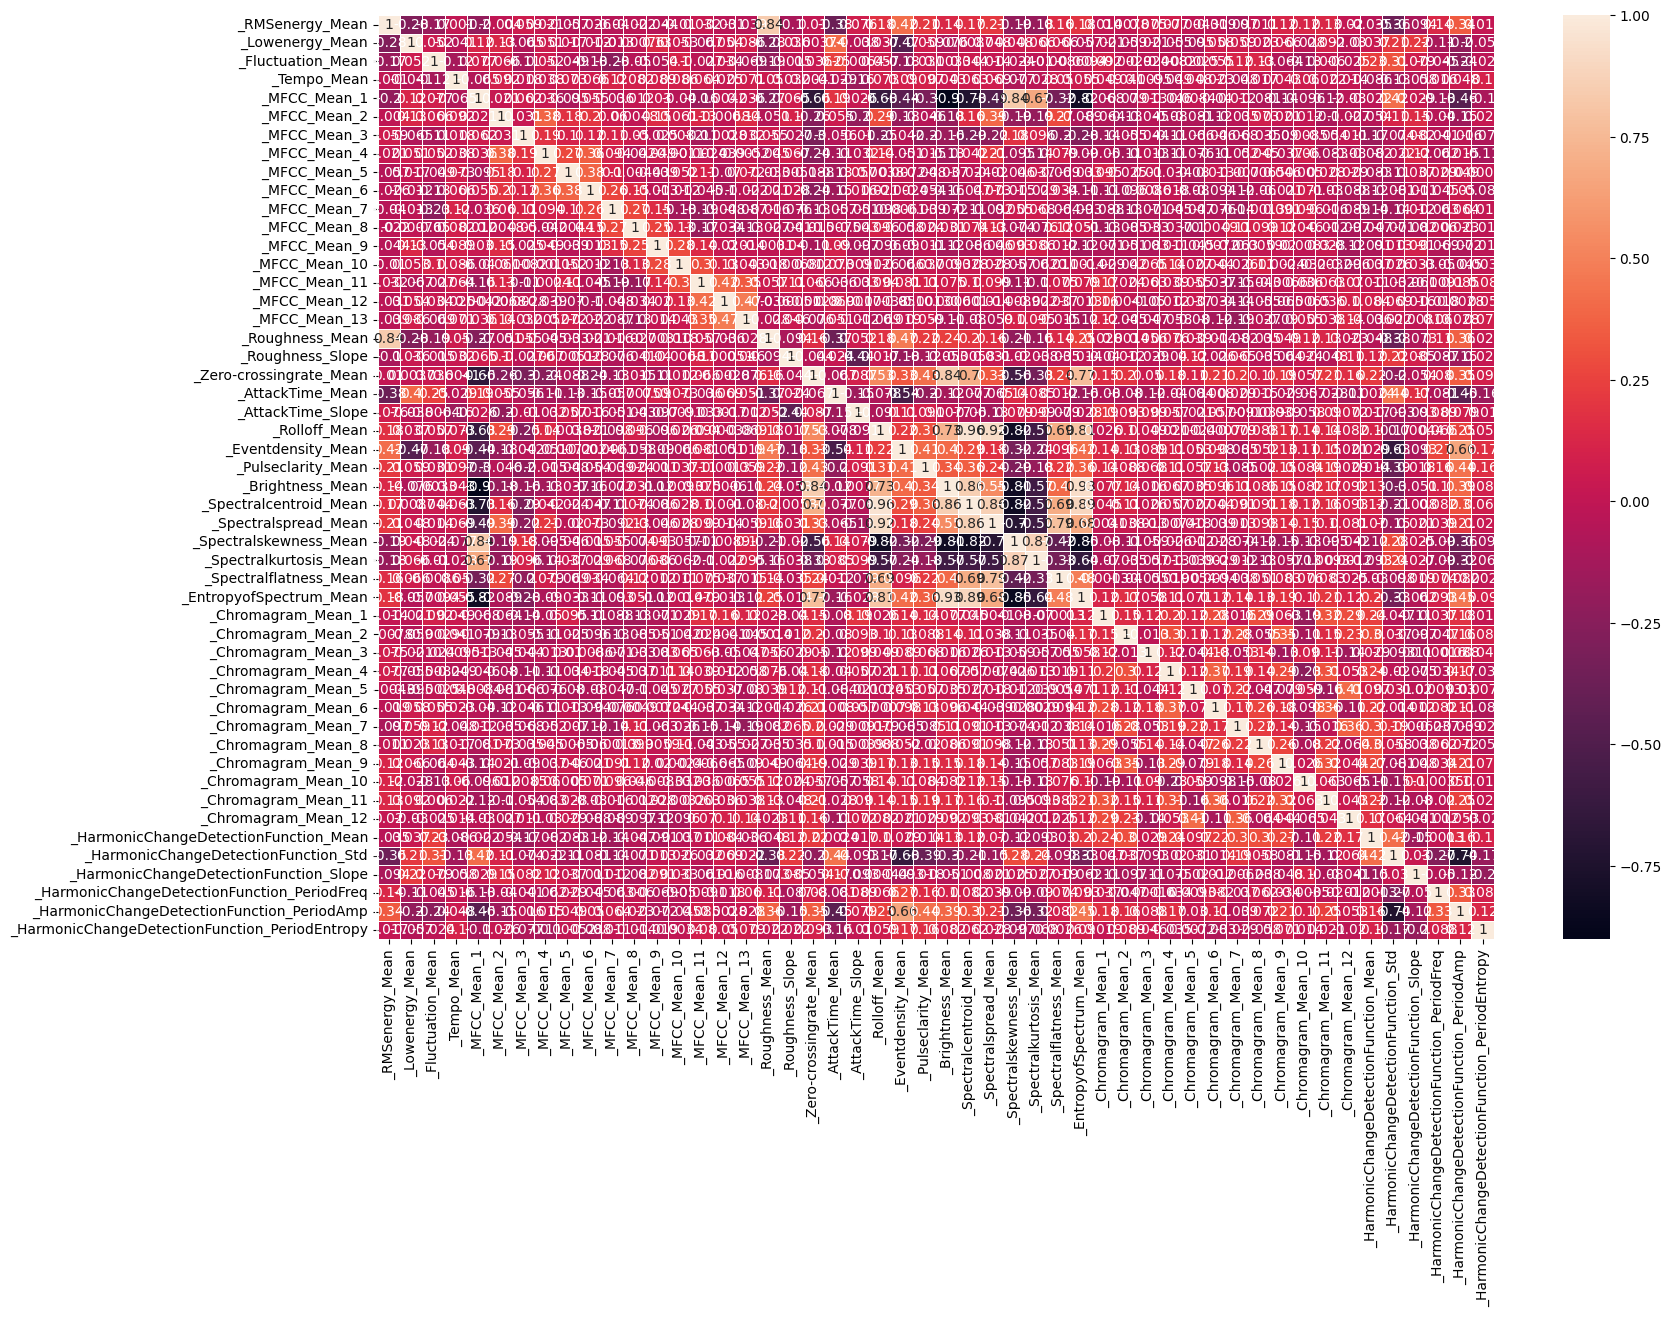

In [ ]:
data_df_numeric = df.select_dtypes(include=[np.number])

data_df_corr = data_df_numeric.corr()

plt.figure(figsize=(18,12))
sns.heatmap(data_df_corr, annot=True, linewidths=0.5)
plt.show()

#**Ingeniería de características**

Media, mediana, desviación estándar por clase

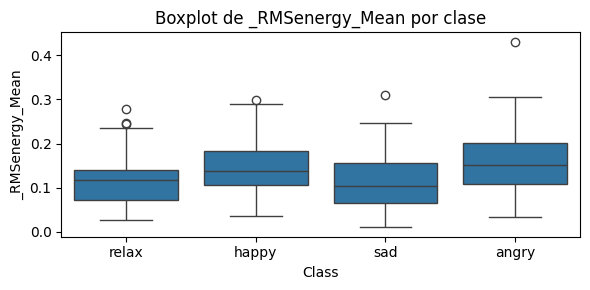

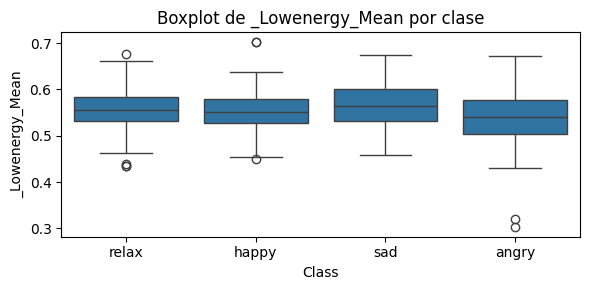

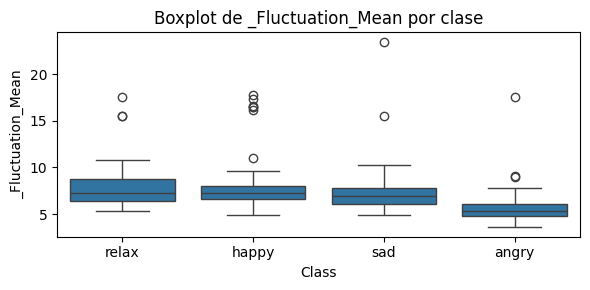

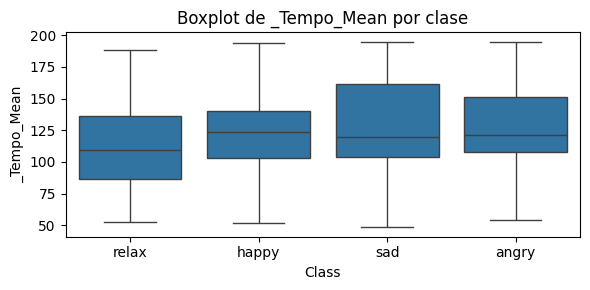

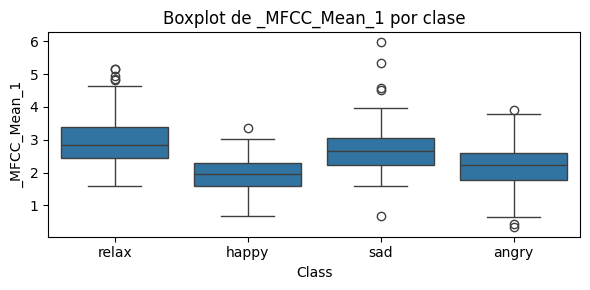

In [ ]:
if 'Class' in df.columns:
    numeric_cols = df.select_dtypes(include=[float, int]).columns
    numeric_cols = numeric_cols.drop('Class', errors='ignore')
    for col in numeric_cols[:5]:
        plt.figure(figsize=(6, 3))
        sns.boxplot(x='Class', y=col, data=df)
        plt.title(f"Boxplot de {col} por clase")
        plt.tight_layout()
        plt.show()
else:
    print("La columna 'Class' no existe en el DataFrame.")


Histogramas

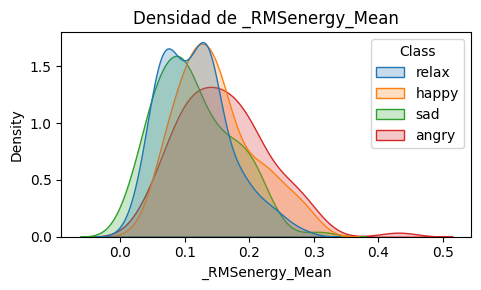

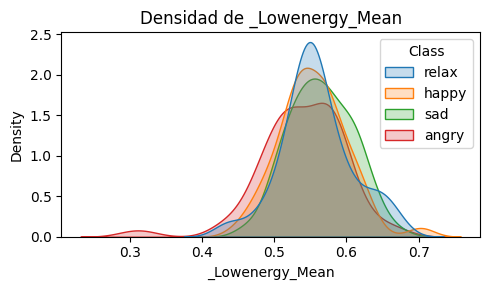

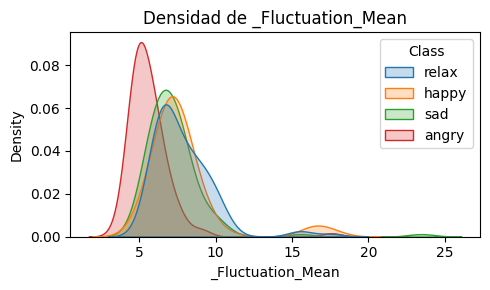

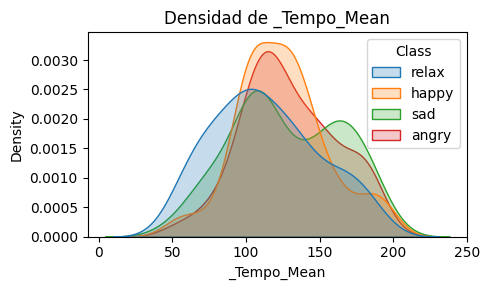

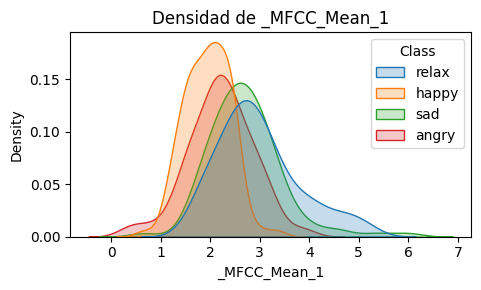

In [ ]:
for col in numeric_cols[:5]:
    plt.figure(figsize=(5,3))
    sns.kdeplot(data=df, x=col, hue="Class", fill=True)
    plt.title(f"Densidad de {col}")
    plt.tight_layout()
    plt.show()


Correlaciones

#**Detección de valores atípicos (outliers)**

Z‑score: marcar valores cuyo z > 3 o < −3:

In [ ]:
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))
outlier_mask = (z_scores > 3)
outlier_counts = outlier_mask.sum(axis=0)
outlier_counts_series = pd.Series(outlier_counts, index=numeric_cols)
outlier_counts_series.sort_values(ascending=False).head(10)


,0
_Fluctuation_Mean,12
_AttackTime_Mean,9
_Spectralskewness_Mean,9
_Spectralflatness_Mean,8
_Roughness_Mean,8
_MFCC_Mean_6,8
_Chromagram_Mean_4,8
_Pulseclarity_Mean,7
_MFCC_Mean_9,5
_MFCC_Mean_13,5


IQR (Interquartile Range)

In [ ]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

is_outlier = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
              (df[numeric_cols] > (Q3 + 1.5 * IQR)))
# cuenta
is_outlier.sum().sort_values(ascending=False).head(10)

,0
_AttackTime_Mean,38
_Spectralkurtosis_Mean,33
_Chromagram_Mean_7,22
_Chromagram_Mean_4,21
_Chromagram_Mean_2,18
_Spectralskewness_Mean,18
_Roughness_Mean,18
_HarmonicChangeDetectionFunction_PeriodEntropy,16
_MFCC_Mean_6,15
_MFCC_Mean_1,15


#**Limpieza y tratamiento de datos**

Asegurar que la columna Class solo contiene las etiquetas esperadas y asegurar que las columnas numéricas no tienen valores “inf“, “NaN” u otros artefactos

In [ ]:
print(df["Class"].unique())

['relax' 'happy' 'sad' 'angry']


Revisar duplicados


In [ ]:
dup_count = df.duplicated().sum()
print("Duplicados:", dup_count)
if dup_count > 0:
    df = df.drop_duplicates()


Duplicados: 12


TODO: Eliminar columnas constantes (desviación cero)

In [ ]:
stds = df[numeric_cols].std()
zero_std = stds[stds == 0].index.tolist()
print("Columnas constantes:", zero_std)
df = df.drop(columns=zero_std)

Columnas constantes: []


Version dataset limpio

In [ ]:
df_original.to_csv("turkish_music_emotion_raw.csv", index=False)
df.to_csv("turkish_music_emotion_cleaned.csv", index=False)

In [ ]:
X = df.loc[:,df.columns != "Class"]
Y = df.loc[:,df.columns == "Class"]
X

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,0.118,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,0.799,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,0.140,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,0.143,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,0.285,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,0.104,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,0.039,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,0.214,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,0.062,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=42)

In [ ]:
standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(X_train)
x_test = standardscaler.transform(X_test)

**Logistic Regression**

In [ ]:
logrregression = LogisticRegression(random_state=0)
logrregression.fit(x_train,Y_train.values.ravel())
y_pred = logrregression.predict(x_test)
print(y_pred)
print(Y_test)

[3 2 3 2 0 1 1 3 1 1 0 3 1 3 3 1 2 3 3 2 0 0 2 1 0 3 0 0 2 0 3 2 3 0 0 2 3
 0 3 1 1 1 2 1 2 3 3 0 3 3 0 2 3 2 3 1 0 2 2 3 1 3 0 3 0 2 2 0 0 1 0 2 1 2
 2 3 1 0 2 3 1 1 0 3 1 2 2 1 3 0 2 0 2 3 0 2 2 1 2 2 3 0 0 2 1 3 0 0 2 3 1
 1 3 1 1 2 0]
     Class
279      3
46       2
172      1
42       2
359      0
..     ...
252      3
216      3
113      1
17       2
301      0

[117 rows x 1 columns]


In [ ]:
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

0.7777777777777778


In [ ]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[25,  1,  1,  2],
       [ 1, 23,  1,  3],
       [ 2,  0, 26,  9],
       [ 1,  2,  3, 17]])

**KNN Classification**

In [ ]:
model = KNeighborsClassifier()
model.fit(x_train, Y_train.values.ravel())
y_pred = model.predict(x_test)
print(accuracy_score(Y_test,y_pred))

0.7094017094017094


In [ ]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[27,  1,  0,  1],
       [ 1, 27,  0,  0],
       [ 8,  1, 19,  9],
       [ 4,  5,  4, 10]])

In [ ]:
model = KNeighborsClassifier(metric="manhattan")
model.fit(x_train, Y_train.values.ravel())
y_pred = model.predict(x_test)
print(accuracy_score(Y_test,y_pred))

0.6752136752136753


In [ ]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[27,  1,  0,  1],
       [ 2, 25,  0,  1],
       [ 7,  1, 16, 13],
       [ 6,  4,  2, 11]])

**Support Vector Machine**

In [ ]:
svc = SVC(kernel='linear')
svc.fit(x_train,Y_train.values.ravel())
y_pred = svc.predict(x_test)
print(accuracy_score(Y_test,y_pred))

0.717948717948718


In [ ]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[27,  0,  0,  2],
       [ 1, 23,  1,  3],
       [ 4,  0, 20, 13],
       [ 2,  4,  3, 14]])

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(x_train,Y_train.values.ravel())
y_pred = svc.predict(x_test)
print(accuracy_score(Y_test,y_pred))

0.7435897435897436


In [ ]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[24,  1,  0,  4],
       [ 0, 24,  1,  3],
       [ 0,  0, 26, 11],
       [ 1,  3,  6, 13]])

**Gaussian Naive Bayes**

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train,Y_train.values.ravel())
y_pred = gnb.predict(x_test)
print(accuracy_score(Y_test,y_pred))

0.7264957264957265


In [ ]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[26,  2,  0,  1],
       [ 1, 25,  1,  1],
       [ 0,  1, 26, 10],
       [ 3,  4,  8,  8]])

**Decision Tree**

In [ ]:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train,Y_train.values.ravel())
y_pred = dtc.predict(x_test)
print(accuracy_score(Y_test,y_pred))

0.7094017094017094


In [ ]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[24,  1,  0,  4],
       [ 2, 22,  2,  2],
       [ 2,  2, 25,  8],
       [ 3,  2,  6, 12]])

**Random Forest**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train,Y_train.values.ravel())
y_pred = rfc.predict(x_test)
print(accuracy_score(Y_test,y_pred))

0.811965811965812


In [ ]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[27,  0,  0,  2],
       [ 1, 26,  0,  1],
       [ 0,  0, 27, 10],
       [ 1,  2,  5, 15]])

**Dimensionality Reduction**

In [ ]:
pca = PCA(n_components=8)
pca.fit(X)
x_pca = pca.transform(X)
transformed = pd.DataFrame(x_pca)
X=transformed
X

,0,1,2,3,4,5,6,7
0,-4318.441458,-317.258200,-112.758011,40.243930,-9.668184,11.081797,2.308417,2.299347
1,-5000.779025,-207.723282,228.630666,172.480678,8.748356,22.963925,5.870664,0.361431
2,5474.520498,-1143.426396,173.364155,-233.686640,228.867468,55.933055,3.455218,2.914458
3,1041.728541,-683.667480,398.572982,22.796566,-212.910816,-58.201709,-0.003126,2.713987
4,-2530.469761,-544.829821,33.515881,382.573491,63.824483,-31.753355,0.133125,2.746496
...,...,...,...,...,...,...,...,...
383,-520.986604,-405.448229,494.089868,310.975563,-39.783600,37.548532,-0.788580,-1.298531
384,5598.424044,-292.922929,831.911429,-358.934908,-211.657121,48.311915,5.221444,-2.099798
385,1588.798118,43.579095,401.809195,115.706035,152.220876,6.340974,0.775721,-2.042811
386,-33.964132,-374.118564,237.941381,324.453500,78.924372,-10.497563,0.322990,-2.541700


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=42)

In [ ]:
x_train = standardscaler.fit_transform(X_train)
x_test = standardscaler.transform(X_test)

In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(x_train, Y_train.values.ravel())

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test)
print(accuracy_score(Y_test,y_pred))

0.6153846153846154


**Hyperparameter Optimization**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000))
])

param_grid = {'classifier__C': [0.001, 0.01, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 100]}

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, Y_train)

# Get the best hyperparameters and accuracy
best_C = grid_search.best_params_['classifier__C']
best_accuracy = grid_search.best_score_
print("Best C:", best_C)
print("Best Accuracy:", best_accuracy)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best C: 0.25
Best Accuracy: 0.6533068783068783


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

**Model Evaluation**

In [ ]:
TODO: El mejor modelo es